# Competition 2 

<img src="credit-card.png">

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. The ultimate goal hear is to predict default on next month payment. More detials about our pipeline can be found in our README.MD file.

Data Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)    

#### Data Description
There are 25 variable columns with 1 target variable **default payment next month** and 23 explanatory variables (ID excluded).

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1 =payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

## Import required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

from sklearn.preprocessing import StandardScaler # for normalization
# Import `train_test_split` from `sklearn.model_selection`
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
# import KNeighborsClassifier from sklearn.neighbors 
from sklearn.neighbors import KNeighborsClassifier
# import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.pipeline import Pipeline 

import time

from astropy.table import Table, Column
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


## Import data

In [3]:
# Create dataframe and reset our header
df = pd.read_excel('default of credit card clients.xls', header=1)

# Check dimesions of data 
print('Number of rows:', df.shape[0], '\n'
      'Number of columns:', df.shape[1])

Number of rows: 30000 
Number of columns: 25


In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Explore Data

In [5]:
# Check for datatypes, null/missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [7]:
# Change name of column 'default payment next month' to 'DEFAULT_STATUS'
# Change column name 'PAY_0' to 'PAY_1', to make it consistent with 'BILL_AMT1' and 'PAY_AMT1'.
df = df.rename(columns={'default payment next month': 'DEFAULT_STATUS', 
                        'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Check Missing Data

In [8]:
# Check for missing values in data
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

There are no missing/null values in entire dataset.

### Data Visualization and Exploratory Data Analysis

#### Categorical Variables

In [9]:
# Categorical Variables statistical description
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


Sex, Education and Marriage are the categorical variable in the dataset. Explore how they are divided and if there are any sparse classes that can overfit the models.

In [10]:
# Distribution of classes in gender
df.SEX.value_counts() 

2    18112
1    11888
Name: SEX, dtype: int64

Distribution is fine and represents thare are more women than men.

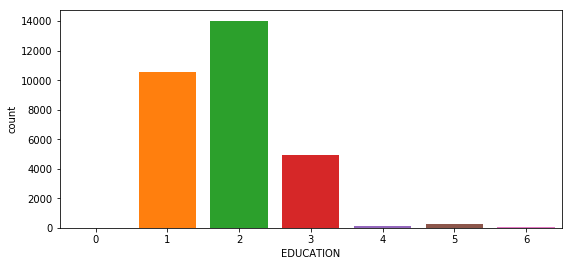

In [11]:
# Distribution of each education class 
plt.figure(figsize=(9, 4))
E1 = sns.countplot(x='EDUCATION', data=df, saturation=1)
#E1.set_xticklabels(['Unkown', 'Graduate School','University','High School','Other', 'Unknown', 'Unknown'])
plt.show()

EDUCATION has unknown and undefined category 0, 5 and 6.

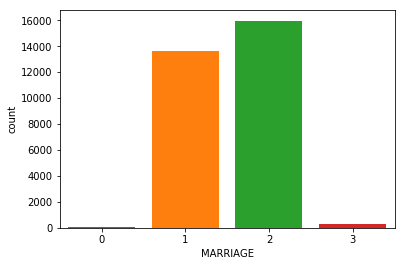

In [12]:
# Distribution of each class in Marriage
Marr = sns.countplot(x='MARRIAGE', data=df, saturation=1)
#Marr.set_xticklabels(['Unknown','Married','Single','Others'])
plt.show()

MARRIAGE has category 0 that is not documented.

##### Compare All Client vs. Defaulted Client: By Age

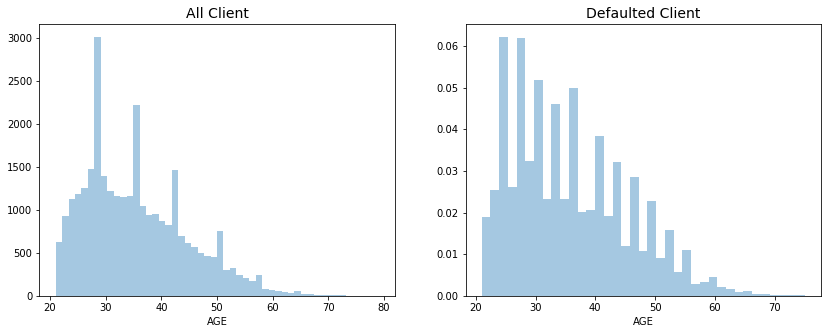

In [13]:
# Plot comparison All Client vs. Defaulted Client: By AGE
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

ax1.set_title('All Client', fontsize=14)
ax2.set_title('Defaulted Client', fontsize=14)

sns.distplot(df['AGE'], norm_hist=False, kde=False, ax=ax1);
sns.distplot(df['AGE'][df['DEFAULT_STATUS'] == 1], norm_hist=True, kde=False, ax=ax2);

We have defaulted clients spread across all age groups.

#### Numerical Variables

In [14]:
# Payment delay Variables statistical description
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Each of the Pay variable has minimum class value -2 which is not defined.

##### Correlation of Rapayment Status with Default Status

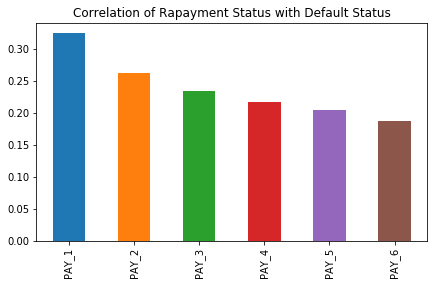

In [15]:
df1 = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
corr1 = df1.corrwith(df['DEFAULT_STATUS']).plot.bar(
        figsize = (7, 4), title = "Correlation of Rapayment Status with Default Status")
#corr1.set_xticklabels(['Repay Status Sept.','Repay Status Aug.', 'Repay Status July.', 'Repay Status June', 'Repay Status May', 'Repay Status April'])
plt.show()

PAY_1 which is the Repayment Status of September, previous month has higher positive correlation with the target variable DEFAULT_STATUS.

In [16]:
# Bill Amount Variables statistical description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


##### Correlation of Monthly Bill Amount with Default Status

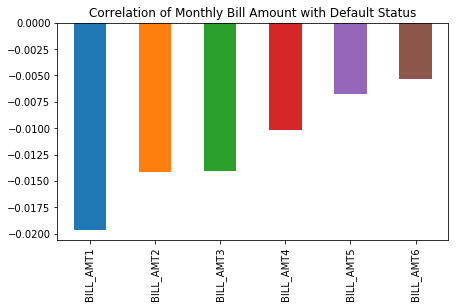

In [17]:
df2 = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
corr2=df2.corrwith(df['DEFAULT_STATUS']).plot.bar(
        figsize = (7, 4), title = "Correlation of Monthly Bill Amount with Default Status")
#corr2.set_xticklabels(['Bill Amt Sept.','Bill Amt Aug.', 'Bill Amt July.', 'Bill Amt June', 'Bill Amt May', 'Bill Amt April'])
plt.show()

BILL_AMT1 which is the Amount of Bill Statement in September(previous month) has higher negative correlation with the target variable DEFAULT_STATUS.

In [18]:
#Previous Payment Variable Statistical Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


##### Correlation of Monthly Payment Amount with Default Status

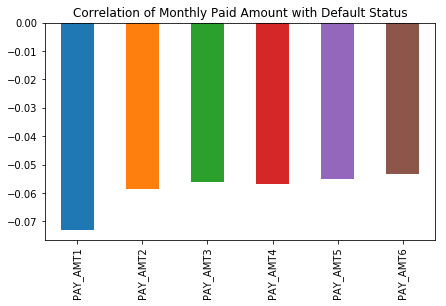

In [19]:
df3 = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
corr3 = df3.corrwith(df['DEFAULT_STATUS']).plot.bar(
        figsize = (7, 4), title = "Correlation of Monthly Paid Amount with Default Status")
#corr3.set_xticklabels(['Paid Amt Sept.','Paid Amt Aug.', 'Paid Amt July.', 'Paid Amt June', 'Paid Amt May', 'Paid Amt April'])
plt.show()

PAY_AMT1 which is the Amount of Previous Payment in September has higher negative correlation with the target variable DEFAULT_STATUS.

In [20]:
# Statistical description of Limit_BAL
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

With a minimum of 10000 and maximum of 1 million, the range of amount of credit given is very broad 

##### Compare All Client vs. Defaulted Client: By Credit Limit

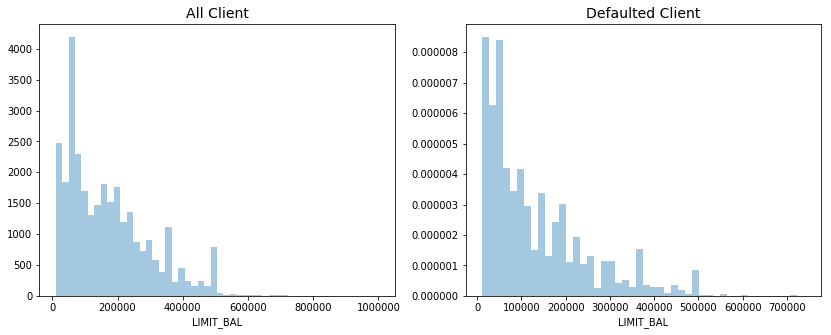

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

ax1.set_title('All Client', fontsize=14)
ax2.set_title('Defaulted Client', fontsize=14)

sns.distplot(df['LIMIT_BAL'], norm_hist=False, kde=False, ax=ax1);
sns.distplot(df['LIMIT_BAL'][df['DEFAULT_STATUS'] == 1], norm_hist=True, kde=False, ax=ax2);

Clients with credit limit less than 100000 have defaulted the most in our data

## Recoding

Category varibles Education and Marriage has undefined classes that needs to be fixed.

In [22]:
# Group Education class '5', '6' and '0' together with '4'
fill = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fill, 'EDUCATION'] = 4
#Check value counts of each class in EDUCATION
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Undefined class 0, 5 and 6 in EDUCATION are grouped together with class 4('Others')

##### Compare Not Defaulted Client vs. Defaulted Client: By Education

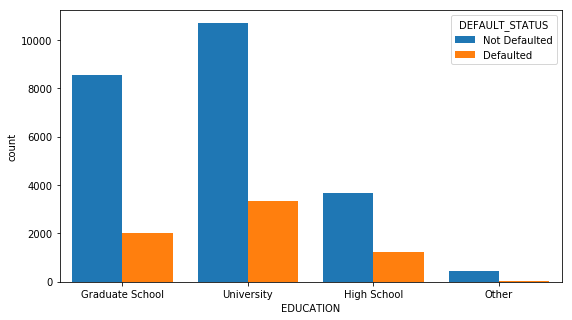

In [23]:
plt.figure(figsize=(9, 5))
E3 = sns.countplot(x='EDUCATION', hue='DEFAULT_STATUS', data=df, saturation=1)
E3.set_xticklabels(['Graduate School','University','High School','Other'])
plt.legend(title='DEFAULT_STATUS', loc='upper right', labels=['Not Defaulted', 'Defaulted'])
plt.show()

The number of University educatied clients are more in the dataset and also they have more defaults.

In [24]:
# Group MARRIAGE '0', with '3'
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3

#Check value counts of each class in MARRIAGE
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Undefined class 0 in MARRIAGE is grouped together with class 3('Others')

##### Compare Not Defaulted Client vs. Defaulted Client: By Marital Status

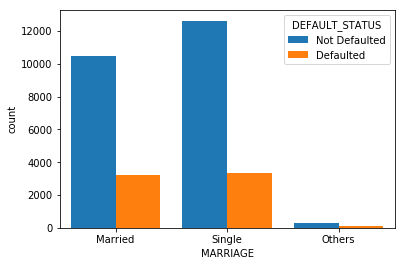

In [25]:
M = sns.countplot(x="MARRIAGE", hue='DEFAULT_STATUS', data=df, saturation=1)
M.set_xticklabels(['Married','Single','Others'])
plt.legend(title='DEFAULT_STATUS', loc='upper right', labels=['Not Defaulted', 'Defaulted'])
plt.show()

Client who are Single are more in the dataset, however they appear to have defaulted less.

In [26]:
# Check the class distribution in PAY_1
df.PAY_1.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

All PAY variables PAY_1, PAY_2.....PAY_6 have classes based on the number of months of delayed payment and -1 corresponds to 'pay duly'. However, we also have -2 and 0 which are not defined or documented. 

In [27]:
#Reassign undocumented class -2,and 0 with -1 for columns 'PAY1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
fill = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fill, 'PAY_1'] = 0
fill = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fill, 'PAY_2'] = 0
fill = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fill, 'PAY_3'] = 0
fill = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fill, 'PAY_4'] = 0
fill = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fill, 'PAY_5'] = 0
fill = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fill, 'PAY_6'] = 0

Classes -2, -1, 0 grouped together as 0 ('pay duly') for all PAY variables.

In [28]:
# Drop column ID
df= df.drop(['ID'], axis=1)

### Binning of variable AGE

In [29]:
# Check the distribution of clients by their Age
df.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

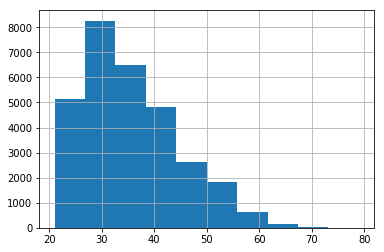

In [30]:
# Check distribution of the data in Age column for binning.
pd.Series.hist(df['AGE'], figsize = [6,4]);

In [31]:
# Create bins to group age into range of 'Below 25', '25 to 35', '35 to 45', '45 to 60' and 'Above 60'.
bins = [0, 25, 35, 45, 60, np.inf]
names = ['Below25', '25to35', '35to45', '45to60', '60Above']

df['AGE_RANGE'] = pd.cut(df['AGE'], bins, labels=names)

# Check the value counts in newly created bins of AGE
df.AGE_RANGE.value_counts()

25to35     12938
35to45      8522
45to60      4397
Below25     3871
60Above      272
Name: AGE_RANGE, dtype: int64

In [32]:
# Drop column AGE
df=df.drop(['AGE'], axis=1)
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT_STATUS',
       'AGE_RANGE'],
      dtype='object')

In [33]:
# Change datatype of descriptive vaiables like SEX, EDUCATION and MARRIAGE to category
df['SEX'] = df['SEX'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')

#Check info and datatpes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null category
EDUCATION         30000 non-null category
MARRIAGE          30000 non-null category
PAY_1             30000 non-null int64
PAY_2             30000 non-null int64
PAY_3             30000 non-null int64
PAY_4             30000 non-null int64
PAY_5             30000 non-null int64
PAY_6             30000 non-null int64
BILL_AMT1         30000 non-null int64
BILL_AMT2         30000 non-null int64
BILL_AMT3         30000 non-null int64
BILL_AMT4         30000 non-null int64
BILL_AMT5         30000 non-null int64
BILL_AMT6         30000 non-null int64
PAY_AMT1          30000 non-null int64
PAY_AMT2          30000 non-null int64
PAY_AMT3          30000 non-null int64
PAY_AMT4          30000 non-null int64
PAY_AMT5          30000 non-null int64
PAY_AMT6          30000 non-null int64
DEFAULT_STATUS    30000 

In [34]:
# Create a dataframe df_features for the predictive data
df_features = df.drop(['DEFAULT_STATUS'], axis=1)

# Create a dataframe 'df_target' for the target variable.
df_target = df.DEFAULT_STATUS

#Create a datarfram from 'df_features' with no features of integer datatype, having only categorical features
df_cat = df_features.select_dtypes(exclude=["int"])
# Seperate the continuous variables for removing skewness in distribution.
df_num = df_features.select_dtypes(include=["int"])

#Check the columns in df_num
print(df_num.columns)

#Check the column in df_cat
print(df_cat.columns)

Index(['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6'],
      dtype='object')
Index(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE_RANGE'], dtype='object')


#### Checking for Outliers

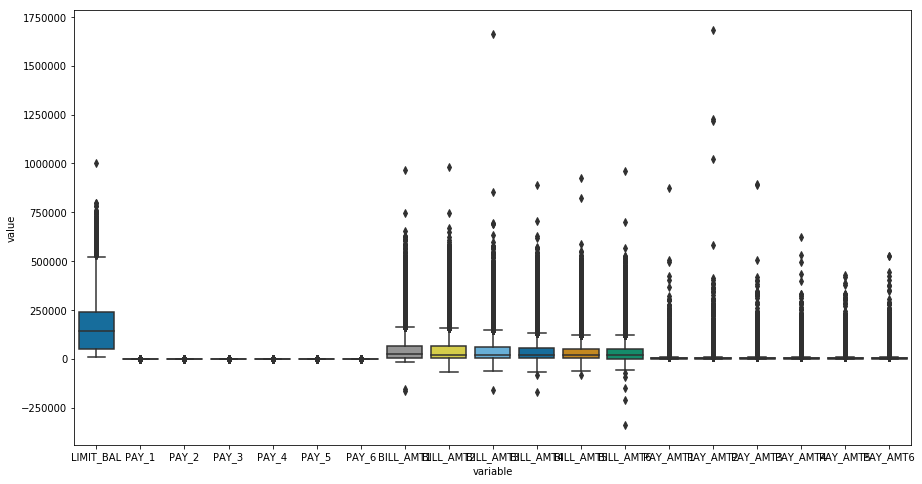

In [35]:
plt.figure(figsize=(15,8)) 
sns.boxplot(x="variable", y="value", data=pd.melt(df_num), palette='colorblind')
plt.show()

A very large portion of the data has outliers. On removing it all, substantial information will be lost. Hence, we shall keep them in the dataset.

#### Get Dummy columns of Categorical Variables

In [36]:
# Get Dummies for all categorical columns
df_cat = pd.get_dummies(df_cat, prefix_sep='_')
# X head
df_cat.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE_RANGE_Below25,AGE_RANGE_25to35,AGE_RANGE_35to45,AGE_RANGE_45to60,AGE_RANGE_60Above
0,0,1,0,1,0,0,1,0,0,1,0,0,0,0
1,0,1,0,1,0,0,0,1,0,0,1,0,0,0
2,0,1,0,1,0,0,0,1,0,0,1,0,0,0
3,0,1,0,1,0,0,1,0,0,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0,0,0,0,1,0


In [37]:
#Check info of the categorical columns
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
SEX_1                30000 non-null uint8
SEX_2                30000 non-null uint8
EDUCATION_1          30000 non-null uint8
EDUCATION_2          30000 non-null uint8
EDUCATION_3          30000 non-null uint8
EDUCATION_4          30000 non-null uint8
MARRIAGE_1           30000 non-null uint8
MARRIAGE_2           30000 non-null uint8
MARRIAGE_3           30000 non-null uint8
AGE_RANGE_Below25    30000 non-null uint8
AGE_RANGE_25to35     30000 non-null uint8
AGE_RANGE_35to45     30000 non-null uint8
AGE_RANGE_45to60     30000 non-null uint8
AGE_RANGE_60Above    30000 non-null uint8
dtypes: uint8(14)
memory usage: 410.2 KB


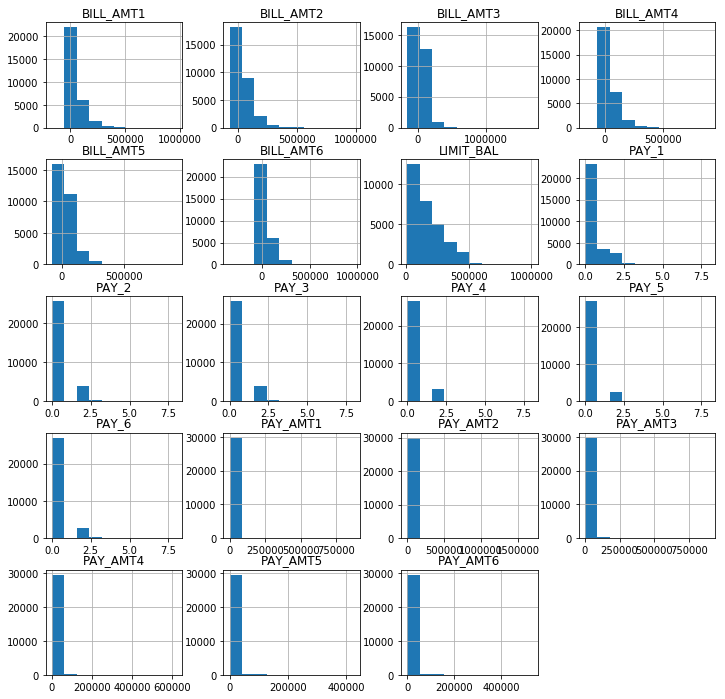

In [38]:
#Plot histogram of the numeric features
pd.DataFrame.hist(df_num, figsize = [12,12]);

## Feature Scaling

In [39]:
#Use min-max scaler to scale the numeric variables
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_num.values)
df_num = pd.DataFrame(x_scaled, index=df_num.index, columns=df_num.columns)

/home/jupyter-dclarke/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


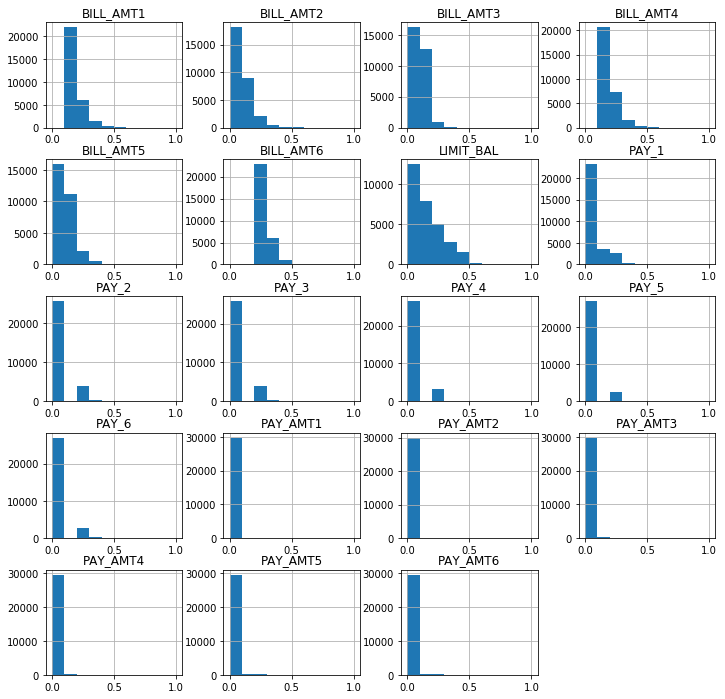

In [40]:
#Plot histogram to check the scale of the numeric variables
pd.DataFrame.hist(df_num, figsize = [12,12]);

## Skewness Handling

In [41]:
# Remove skewness from the skewed data using square cube root.
df_num['BILL_AMT1'] = df_num['BILL_AMT1']**(1/3)
df_num['BILL_AMT2'] = df_num['BILL_AMT2']**(1/3)
df_num['BILL_AMT3'] = df_num['BILL_AMT3']**(1/3)
df_num['BILL_AMT4'] = df_num['BILL_AMT4']**(1/3)
df_num['BILL_AMT5'] = df_num['BILL_AMT5']**(1/3)
df_num['BILL_AMT6'] = df_num['BILL_AMT6']**(1/3)
df_num['LIMIT_BAL'] = df_num['LIMIT_BAL']**(1/3)
df_num['PAY_1'] = df_num['PAY_1']**(1/3)
df_num['PAY_2'] = df_num['PAY_2']**(1/3)
df_num['PAY_3'] = df_num['PAY_3']**(1/3)
df_num['PAY_4'] = df_num['PAY_4']**(1/3)
df_num['PAY_5'] = df_num['PAY_5']**(1/3)
df_num['PAY_6'] = df_num['PAY_6']**(1/3)
df_num['PAY_AMT1'] = df_num['PAY_AMT1']**(1/3)
df_num['PAY_AMT2'] = df_num['PAY_AMT2']**(1/3)
df_num['PAY_AMT3'] = df_num['PAY_AMT3']**(1/3)
df_num['PAY_AMT4'] = df_num['PAY_AMT4']**(1/3)
df_num['PAY_AMT5'] = df_num['PAY_AMT5']**(1/3)
df_num['PAY_AMT6'] = df_num['PAY_AMT6']**(1/3)

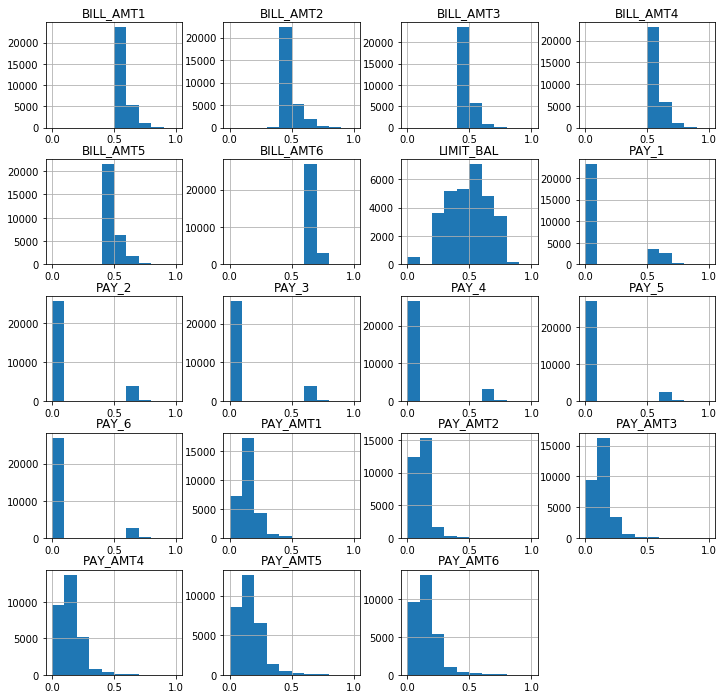

In [42]:
## Plot histogram to see the skewness/distribution of each column
pd.DataFrame.hist(df_num, figsize = [12,12]);

In [43]:
# Join the dataframes df_cat, df_num and df_target together
df = pd.concat([df_cat, df_num, df_target], axis=1)

#Check the columns in dataframe df
df.columns

Index(['SEX_1', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'AGE_RANGE_Below25', 'AGE_RANGE_25to35', 'AGE_RANGE_35to45',
       'AGE_RANGE_45to60', 'AGE_RANGE_60Above', 'LIMIT_BAL', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_STATUS'],
      dtype='object')

In [44]:
#Check the head of datafame df
df.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE_RANGE_Below25,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS
0,0,1,0,1,0,0,1,0,0,1,...,0.543039,0.432047,0.639050,0.000000,0.074234,0.000000,0.000000,0.000000,0.000000,1
1,0,1,0,1,0,0,0,1,0,0,...,0.546501,0.438080,0.641089,0.000000,0.084049,0.103727,0.117211,0.000000,0.155817,1
2,0,1,0,1,0,0,0,1,0,0,...,0.557889,0.457042,0.648658,0.120225,0.096212,0.103727,0.117211,0.132847,0.211477,0
3,0,1,0,1,0,0,1,0,0,0,...,0.571653,0.478215,0.657071,0.131799,0.106229,0.110226,0.120995,0.135834,0.123672,0
4,1,0,0,1,0,0,1,0,0,0,...,0.564478,0.463590,0.650832,0.131799,0.279261,0.223473,0.243809,0.117334,0.108700,0


## Correlation

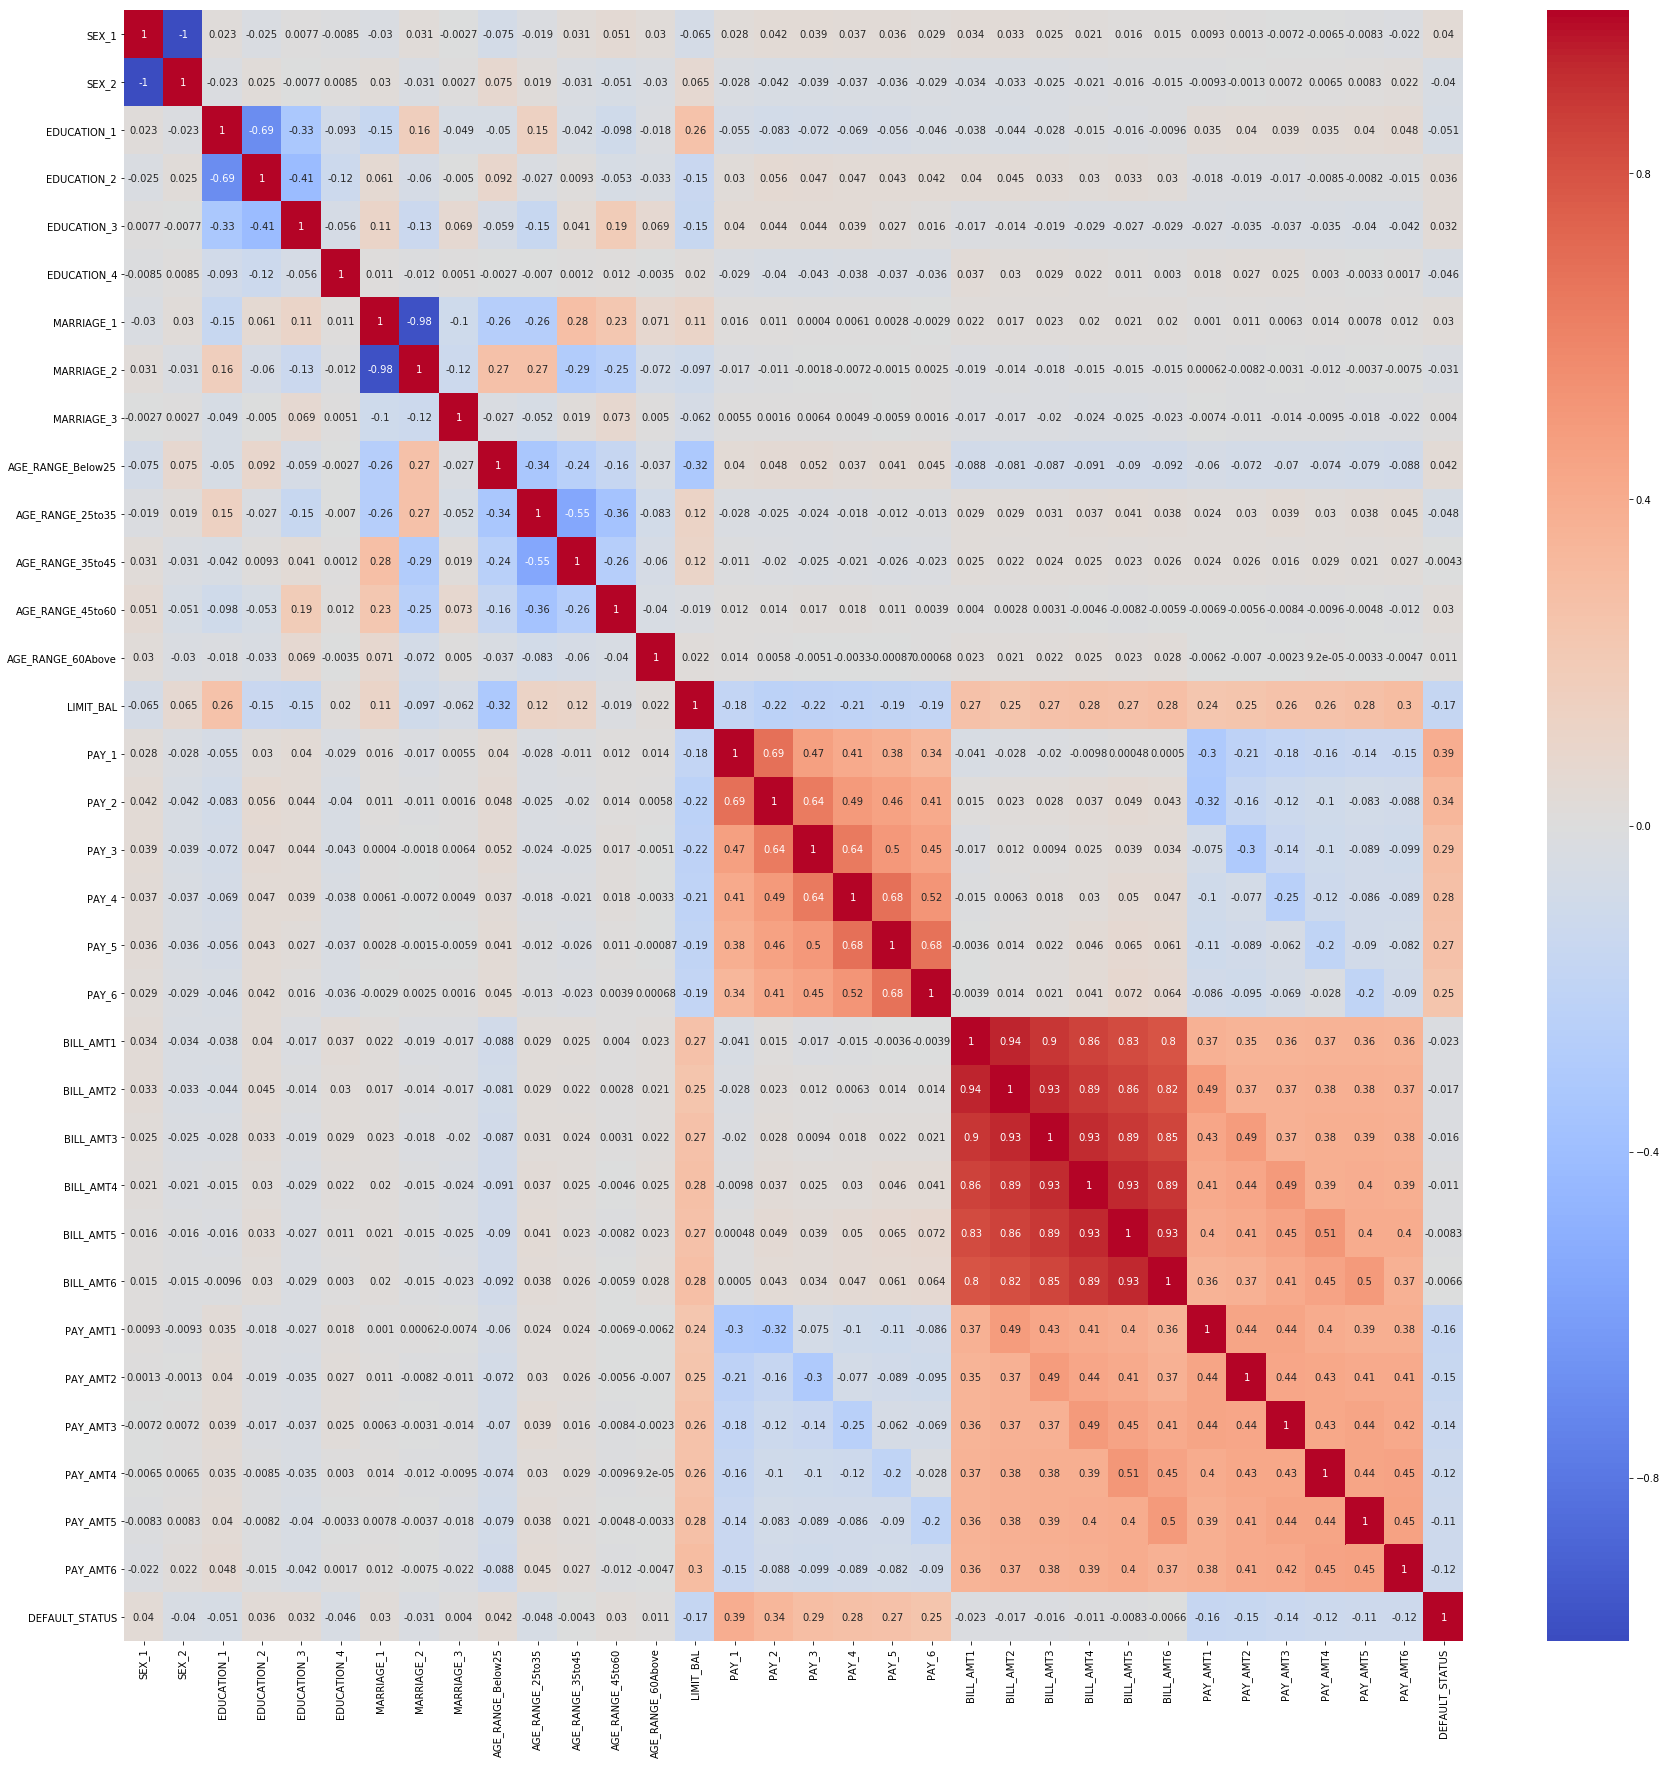

In [45]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

Correlation of DEFAULT_STATUS is lowest at -0.17 with LIMIT_BAL. 
This negative correlation indicates that higher the credit limit, lower the chance of deafulting.

Highest is 0.39 correlate with PAY_1.
This positive correlation indicates that longer the period of delayed Payment, higher chances of Default.

All PAY_n variables from PAY_1.....PAY_6 have higher correlation to DEFAULT_STATUS compare to other variables.
Hence, clients payment behaviour strongly indication their chances of Defaulting.


In [46]:
# Feature Matrix
X =  df.drop(['DEFAULT_STATUS'], axis=1)
y = df.DEFAULT_STATUS

print(X.shape)
print(y.shape)
y.head()

(30000, 33)
(30000,)


0    1
1    1
2    0
3    0
4    0
Name: DEFAULT_STATUS, dtype: int64

### Data Imbalance

In [47]:
#Check the data balance of class in target variable DEFAULT STATUS
df.DEFAULT_STATUS.value_counts()

0    23364
1     6636
Name: DEFAULT_STATUS, dtype: int64

Distribution for our target variable DEFAULT_STATUS is:   
Not Default = 23364 | Default = 6636    
This appears to have imbalance as out of 30000 clients only 22% appear to be defaulting.

In [48]:
# Split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2019)

In [49]:
# To handle the target imbalance import SMOTE from imblearn.over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2019)
X_resample, y_resample = sm.fit_resample(X_train, y_train)

In [50]:
#Check the class balance after SMOTE versampling
y_nonzero_num = np.count_nonzero(y_resample==1)
y_zero_num = np.count_nonzero(y_resample==0)
print('y_resample[==1]:', y_nonzero_num)

print('y_resample[==0]:', y_zero_num)


y_resample[==1]: 17458
y_resample[==0]: 17458


### Feature Selection Using RFE

In [51]:
# Feature extraction using Recursive Feature Elimination
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
feature_names = np.array(X.columns)
print('Most important features (RFE): %s'% feature_names[fit.support_])

Num Features: 3
Selected Features: [False False False False False False False False False False False False
 False False False  True False False False False False False False False
  True False False False  True False False False False]
Feature Ranking: [11 10 31 30 29  7 18 16 17 24 22 23 25 26  3  1 28 12 19 13  6 20  8  4
  1 14 27  9  1  2  5 21 15]
Most important features (RFE): ['PAY_1' 'BILL_AMT4' 'PAY_AMT2']


### Feature Importance

[0.00875174 0.00889419 0.01045367 0.0123905  0.01037952 0.00227095
 0.01001244 0.00971241 0.00259033 0.00747411 0.01003497 0.01072297
 0.00867482 0.00261747 0.07237433 0.09582383 0.04170295 0.02980734
 0.01797727 0.02087952 0.01868232 0.05671445 0.05101672 0.04912368
 0.04858141 0.04839984 0.04821881 0.04939957 0.04739018 0.04708664
 0.04607408 0.04676291 0.04900404]


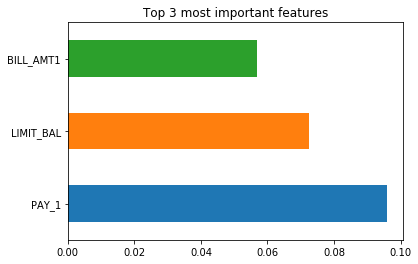

In [52]:
#Feature Importance among the variables using ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#Check the top 3 features with highest score
feat_importances.nlargest(3).plot(kind='barh')
plt.title('Top 3 most important features')
plt.show()

In [53]:
# Selected Features based on Correlation 
X1 = df[['PAY_1','LIMIT_BAL','BILL_AMT1']]
y1 = df.DEFAULT_STATUS

In [54]:
# Split the data into training and test sets 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=2019)

In [54]:
# To handle the target imbalance import SMOTE from imblearn.over_sampling
sm = SMOTE(random_state=2019)
X1_resample, y1_resample = sm.fit_resample(X1_train, y1_train)

## Models

### Logistic Regression All Features

In [55]:
# instantiate the model 
logreg = LogisticRegression(solver='liblinear', random_state=2019)
# fit the model with data
logreg.fit(X_resample,y_resample)
y_pred = logreg.predict(X_test)
print('The accuracy of the Logistic Regression using all variables is:',metrics.accuracy_score(y_test, y_pred).round(2))

#AUC of the model
auc = roc_auc_score(y_test,y_pred)
print('AUC:{:.4f}'.format(round(np.mean(auc),4)))

print()
print(classification_report(y_test, y_pred))

The accuracy of the Logistic Regression using all variables is: 0.76
AUC:0.7060

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5906
           1       0.45      0.62      0.52      1594

   micro avg       0.76      0.76      0.76      7500
   macro avg       0.67      0.71      0.68      7500
weighted avg       0.79      0.76      0.77      7500



#### Logistic Regression with All Features: Cross-Validation

In [56]:
## 10-fold cross-validation to avoid over-fitting
scoring = 'accuracy'
#LR_cv_scores =cross_val_score(LR, X_resample, y_resample, cv=kfold, scoring=scoring)
cv_scores =cross_val_score(logreg, X_resample, y_resample, cv=10, scoring=scoring)

print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),2)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),2)))

Average 10-Fold CV Score: 0.7 , Standard deviation: 0.01


#### Logistic Regression with All Features: Hyperparameter Optimization

In [57]:
# Setup the hyperparameter grid
dual=[True,False]
C = [0.2,0.5,1.0,1.5,2.0,2.5]
max_iter=[1000,1100,1200,1500]
param_grid = dict(dual=dual,C=C,max_iter=max_iter)

import time

# Instantiate a logistic regression classifier
logreg = LogisticRegression(penalty='l2')

# Instantiate the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid , cv=10)

start_time = time.time()
# Fit it to the data
logreg_cv.fit(X_resample, y_resample)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 

# Summarize results
print("Best: %f using %s" % (logreg_cv.best_score_, logreg_cv.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Tuned Logistic Regression Parameters: {'C': 0.5, 'dual': True, 'max_iter': 1000}
Best: 0.698247 using {'C': 0.5, 'dual': True, 'max_iter': 1000}
Execution time: 147.33030772209167 ms


Accuracy: 0.7581333333333333
AUC: 0.7670627471541818
Average 10-Fold CV Score: 0.6982 , Standard deviation: 0.0104

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5906
           1       0.45      0.61      0.52      1594

   micro avg       0.76      0.76      0.76      7500
   macro avg       0.67      0.71      0.68      7500
weighted avg       0.79      0.76      0.77      7500




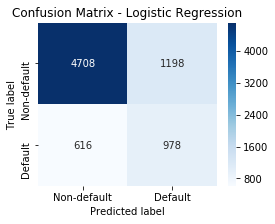

In [58]:
LR = LogisticRegression(C=0.5, max_iter=1000, dual=True, random_state=2019)
LR.fit(X_resample, y_resample)
y_pred = LR.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

# Compute AUC of the model
y_pred_prob = LR.predict_proba(X_test)[:,1]
#auc = roc_auc_score(y_test, y_pred_prob)
print('AUC:', roc_auc_score(y_test, y_pred_prob))

## 10-fold cross-validation to avoid over-fitting
scoring = 'accuracy'
cv_scores =cross_val_score(LR, X_resample, y_resample, cv=10, scoring=scoring)

print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

# Print the 10-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()

# Plot Confusion Matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

### Logistic Regression Important Features

In [59]:
# instantiate the model (using the default parameters)
logregimp = LogisticRegression()

# fit the model with data
logregimp.fit(X1_resample,y1_resample)
y1_pred = logregimp.predict(X1_test)

#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y1_test, y1_pred)
print('Confusion Matrix:')
print(cnf_matrix)
print("Accuracy with Logistic Regression:", metrics.accuracy_score(y1_test, y1_pred).round(4))
print('Classification Report for Logistic Regression Classfier:')
print(classification_report(y1_test, y1_pred))

Confusion Matrix:
[[5004  902]
 [ 726  868]]
Accuracy with Logistic Regression: 0.7829
Classification Report for Logistic Regression Classfier:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5906
           1       0.49      0.54      0.52      1594

   micro avg       0.78      0.78      0.78      7500
   macro avg       0.68      0.70      0.69      7500
weighted avg       0.79      0.78      0.79      7500



#### Logistic Regression with Important Features: Cross Validation

In [60]:
## 10-fold cross-validation to avoid over-fitting
scoring = 'accuracy'
cv_scores =cross_val_score(logregimp, X1_resample, y1_resample, cv=10, scoring=scoring)

print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Average 10-Fold CV Score: 0.684 , Standard deviation: 0.0082


#### Logistic Regression with Important Features: Hyperparameter Optimization

In [61]:
# Setup the hyperparameter grid
dual=[True,False]
C = [0.2,0.5,1.0,1.5,2.0,2.5]
max_iter=[1000,1100,1200,1300,1400]
param_grid = dict(dual=dual,C=C,max_iter=max_iter)

# Instantiate the GridSearchCV object
logreg_cv = GridSearchCV(logregimp, param_grid , cv=10)

start_time = time.time()
# Fit it to the data
logreg_cv.fit(X1_resample, y1_resample)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 

# Summarize results
print("Best: %f using %s" % (logreg_cv.best_score_, logreg_cv.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Tuned Logistic Regression Parameters: {'C': 0.2, 'dual': True, 'max_iter': 1000}
Best: 0.683984 using {'C': 0.2, 'dual': True, 'max_iter': 1000}
Execution time: 68.3975944519043 ms


Accuracy: 0.7829333333333334
AUC: 0.7405348472790574
Average 10-Fold CV Score: 0.684 , Standard deviation: 0.0082

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5906
           1       0.49      0.54      0.52      1594

   micro avg       0.78      0.78      0.78      7500
   macro avg       0.68      0.70      0.69      7500
weighted avg       0.79      0.78      0.79      7500




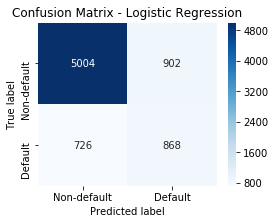

In [62]:
LR_imp = LogisticRegression(C=0.2, max_iter=1000, dual=True, random_state=2019)
# Fit it to the data
LR_imp.fit(X1_resample, y1_resample)
y1_pred = LR_imp.predict(X1_test)
print('Accuracy:', metrics.accuracy_score(y1_pred,y1_test))

# Compute AUC of the model
y_pred_prob = LR_imp.predict_proba(X1_test)[:,1]
#auc = roc_auc_score(y_test, y_pred_prob)
print('AUC:', roc_auc_score(y1_test, y_pred_prob))

## 10-fold cross-validation
scoring = 'accuracy'
cv_scores =cross_val_score(LR_imp, X1_resample, y1_resample, cv=10, scoring=scoring)

print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

# Print the classification report
print()
print(classification_report(y1_test, y1_pred))
print()

# Plot Confusion Matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y1_test,LR_imp.predict(X1_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

### K-NN Classifier All Features

In [63]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 10)
# training the classifier
knn.fit(X_resample,y_resample)
# do our predictions on the test
y_pred = knn.predict(X_test)
print('The accuracy of the KNN using all variables is:',metrics.accuracy_score(y_test, y_pred).round(2))

The accuracy of the KNN using all variables is: 0.69


#### K-NN Classifier All Features: Cross Validation

In [64]:
## 10-fold cross-validation to avoid over-fitting
scoring = 'accuracy'
#LR_cv_scores =cross_val_score(LR, X_resample, y_resample, cv=kfold, scoring=scoring)
cv_scores =cross_val_score(knn, X_resample, y_resample, cv=10, scoring=scoring)

print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Average 10-Fold CV Score: 0.7586 , Standard deviation: 0.0195


#### K-NN Classifier All Features: Hyperparameter Optimization

In [65]:
# Setup the hyperparameter grid
k_range = list(range(1,11))
weights = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weights)

# Instantiate the GridSearchCV object
knn_cv = GridSearchCV(knn, param_grid, cv=10)

start_time = time.time()
# Fit it to the data
knn_cv.fit(X1_resample, y1_resample)

# Print the tuned parameters and score
print("Tuned K-Nearest Neighbor Parameters: {}".format(knn_cv.best_params_)) 

# Summarize results
print("Best: %f using %s" % (knn_cv.best_score_, knn_cv.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Tuned K-Nearest Neighbor Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Best: 0.718238 using {'n_neighbors': 7, 'weights': 'uniform'}
Execution time: 140.24004411697388 ms


Accuracy: 0.6621333333333334
AUC: 0.7016208236865218
Average 10-Fold CV Score: 0.7682 , Standard deviation: 0.0188

              precision    recall  f1-score   support

           0       0.87      0.67      0.76      5906
           1       0.34      0.64      0.45      1594

   micro avg       0.66      0.66      0.66      7500
   macro avg       0.61      0.65      0.60      7500
weighted avg       0.76      0.66      0.69      7500




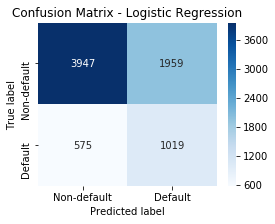

In [66]:
K_NN = KNeighborsClassifier(n_neighbors = 7, weights='uniform')
K_NN.fit(X_resample, y_resample)
y_pred = K_NN.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

# Compute AUC of the model
y_pred_prob = K_NN.predict_proba(X_test)[:,1]
print('AUC:', roc_auc_score(y_test, y_pred_prob))

## 10-fold cross-validation to avoid over-fitting
scoring = 'accuracy'
cv_scores =cross_val_score(K_NN, X_resample, y_resample, cv=10, scoring=scoring)

# Print the 10-fold cross-validation scores
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

print()
print(classification_report(y_test, y_pred))
print()

# Plot Confusion Matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,K_NN.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

### KNeighborsClassifier Important Features

In [67]:
# Create KNN classifier
knnimp = KNeighborsClassifier(n_neighbors = 10)
# training the classifier
knnimp.fit(X1_resample,y1_resample)

# do our predictions on the test
y1_pred = knnimp.predict(X1_test)

# Plot Confusion Matrix
print("Accuracy with kNN:", metrics.accuracy_score(y1_test, y1_pred).round(2))
print('Confusion Matrix for k-NN Classfier:')
print(confusion_matrix(y1_test, y1_pred))

print('Classification Report for k-NN Classfier:')
print(classification_report(y1_test, y1_pred))

Accuracy with kNN: 0.72
Confusion Matrix for k-NN Classfier:
[[4507 1399]
 [ 693  901]]
Classification Report for k-NN Classfier:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      5906
           1       0.39      0.57      0.46      1594

   micro avg       0.72      0.72      0.72      7500
   macro avg       0.63      0.66      0.64      7500
weighted avg       0.77      0.72      0.74      7500



#### K-NN Classifier Important Features: Cross Validation

In [68]:
## 10-fold cross-validation to avoid over-fitting
scoring = 'accuracy'
cv_scores =cross_val_score(knnimp, X1_resample, y1_resample, cv=10, scoring=scoring)

print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Average 10-Fold CV Score: 0.7164 , Standard deviation: 0.0092


#### K-NN Classifier Important Features: Hyperparameter Optimization

In [69]:
# Setup the hyperparameter grid
k_range = list(range(1,11))
weights=['uniform', 'distance']
param_grid = dict(n_neighbors=k_range,weights=weights)

# Instantiate the GridSearchCV object
knn_cv = GridSearchCV(knnimp, param_grid, cv=10)

start_time = time.time()
# Fit it to the data
knn_cv.fit(X1_resample, y1_resample)

# Print the tuned parameters and score
print("Tuned K-Nearest Neighbor Parameters: {}".format(knn_cv.best_params_)) 

# Summarize results
print("Best: %f using %s" % (knn_cv.best_score_, knn_cv.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Tuned K-Nearest Neighbor Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Best: 0.718238 using {'n_neighbors': 7, 'weights': 'uniform'}
Execution time: 147.87096881866455 ms


Accuracy: 0.7210666666666666
AUC: 0.7017272590534858

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      5906
           1       0.39      0.57      0.46      1594

   micro avg       0.72      0.72      0.72      7500
   macro avg       0.63      0.66      0.64      7500
weighted avg       0.77      0.72      0.74      7500


Average 10-Fold CV Score: 0.7182 , Standard deviation: 0.0101


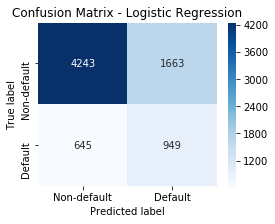

In [70]:
K_NNimp = KNeighborsClassifier(n_neighbors = 7)
K_NNimp.fit(X1_resample, y1_resample)
y_pred = K_NNimp.predict(X1_test)
print('Accuracy:', metrics.accuracy_score(y1_pred,y1_test))

# Compute AUC of the model
y_pred_prob = K_NNimp.predict_proba(X1_test)[:,1]
print('AUC:', roc_auc_score(y1_test, y_pred_prob))

## 10-fold cross-validation to avoid over-fitting
scoring = 'accuracy'
cv_scores =cross_val_score(K_NNimp, X1_resample, y1_resample, cv=10, scoring=scoring)

# Print the 10-fold cross-validation scores
print()
print(classification_report(y1_test, y1_pred))
print()
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

# Plot Confusion Matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y1_test,K_NNimp.predict(X1_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

### DecisionTree Classifier All Features

In [71]:
tree = DecisionTreeClassifier(max_depth=10, random_state=2019) 

# training the classifier
tree.fit(X_resample, y_resample) 

# do our predictions on the test
y_pred = tree.predict(X_test)
print('The accuracy of the Decision Tree using all variables is:',metrics.accuracy_score(y_test, y_pred).round(2))

The accuracy of the Decision Tree using all variables is: 0.72


#### DecisionTree Classifier All Features: Cross Validation

In [72]:
## 10-fold cross-validation to avoid over-fitting
scoring = 'accuracy'
cv_scores =cross_val_score(tree, X_resample, y_resample, cv=10, scoring=scoring)

print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Average 10-Fold CV Score: 0.7338 , Standard deviation: 0.032


#### Decision Tree All Features: Hyperparameter Optimization

In [73]:
# Setup the parameters and distributions
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_dist, cv=10)

start_time = time.time()
# Fit it to the data
tree_cv.fit(X_resample, y_resample)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

# Summarize results
print("Best: %f using %s" % (tree_cv.best_score_, tree_cv.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 9, 'min_samples_leaf': 4}
Best: 0.723594 using {'criterion': 'gini', 'max_depth': 9, 'max_features': 9, 'min_samples_leaf': 4}
Execution time: 928.2097911834717 ms


Accuracy: 0.7637333333333334
AUC: 0.7170610688320279
Average 10-Fold CV Score: 0.7236 , Standard deviation: 0.0268

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      5906
           1       0.45      0.52      0.48      1594

   micro avg       0.76      0.76      0.76      7500
   macro avg       0.66      0.68      0.67      7500
weighted avg       0.78      0.76      0.77      7500




Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

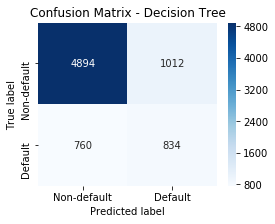

In [74]:
DTC = DecisionTreeClassifier(criterion= 'gini', max_depth= 9, 
                                     max_features= 9, min_samples_leaf= 4, 
                                     random_state=2019)
DTC.fit(X_resample, y_resample)
y_pred = DTC.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

# Compute AUC of the model
y_pred_prob = DTC.predict_proba(X_test)[:,1]
print('AUC:', roc_auc_score(y_test, y_pred_prob))

## 10-fold cross-validation 
cv_scores =cross_val_score(DTC, X_resample, y_resample, cv=10)
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))
# Print the 10-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()

# Plot Confusion Matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,DTC.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree")

#### DecisionTreeClassifier Important Features

In [75]:
treeimp = DecisionTreeClassifier(max_depth=10, random_state=2019) 

# training the classifier
treeimp.fit(X1_resample, y1_resample)
# do our predictions on the test
y_pred = treeimp.predict(X1_test)
# see how good we did on the test
print('Accuracy Score:', accuracy_score(y1_test, y1_pred).round(2))
print('Classification Report for DecisionTree Classfier:')
print(classification_report(y1_test, y1_pred))

Accuracy Score: 0.72
Classification Report for DecisionTree Classfier:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      5906
           1       0.39      0.57      0.46      1594

   micro avg       0.72      0.72      0.72      7500
   macro avg       0.63      0.66      0.64      7500
weighted avg       0.77      0.72      0.74      7500



#### DecisionTree Classifier Important Features: Cross Validation

In [76]:
## 10-fold cross-validation to avoid over-fitting
scoring = 'accuracy'
cv_scores =cross_val_score(treeimp, X1_resample, y1_resample, cv=10, scoring=scoring)

print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Average 10-Fold CV Score: 0.6963 , Standard deviation: 0.0104


#### Decision Tree Important Features: Hyperparameter Optimization

In [77]:
# Setup the parameters and distributions
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = GridSearchCV(treeimp, param_dist, cv=10)

start_time = time.time()
# Fit it to the data
tree_cv.fit(X1_resample, y1_resample)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

# Summarize results
print("Best: %f using %s" % (tree_cv.best_score_, tree_cv.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 4}
Best: 0.696386 using {'criterion': 'entropy', 'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 4}
Execution time: 166.79630637168884 ms


Accuracy: 0.7536
AUC: 0.7547743485242026
Average 10-Fold CV Score: 0.6964 , Standard deviation: 0.0117

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5906
           1       0.44      0.59      0.51      1594

   micro avg       0.75      0.75      0.75      7500
   macro avg       0.66      0.70      0.67      7500
weighted avg       0.79      0.75      0.77      7500




Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

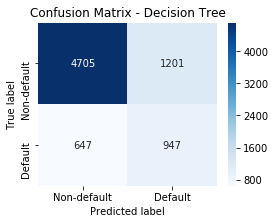

In [78]:
DTC_imp = DecisionTreeClassifier(criterion= 'entropy', max_depth= 9, 
                                     max_features= 2, min_samples_leaf= 4, 
                                     random_state=2019)
DTC_imp.fit(X1_resample, y1_resample)
y1_pred = DTC_imp.predict(X1_test)
print('Accuracy:', metrics.accuracy_score(y1_pred,y1_test))

# Compute AUC of the model
y_pred_prob = DTC_imp.predict_proba(X1_test)[:,1]
print('AUC:', roc_auc_score(y1_test, y_pred_prob))

## 10-fold cross-validation 
cv_scores =cross_val_score(DTC_imp, X1_resample, y1_resample, cv=10)
# Print the 10-fold cross-validation scores
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

#print the classification report
print()
print(classification_report(y1_test, y1_pred))
print()

# Plot Confusion Matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y1_test,DTC_imp.predict(X1_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree")

In [55]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8281333333333334


In [56]:
feature_cols= ['PAY_1','LIMIT_BAL','BILL_AMT1']

In [61]:
feature_cols = ['SEX_1', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'AGE_RANGE_Below25', 'AGE_RANGE_25to35', 'AGE_RANGE_35to45',
       'AGE_RANGE_45to60', 'AGE_RANGE_60Above', 'LIMIT_BAL', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

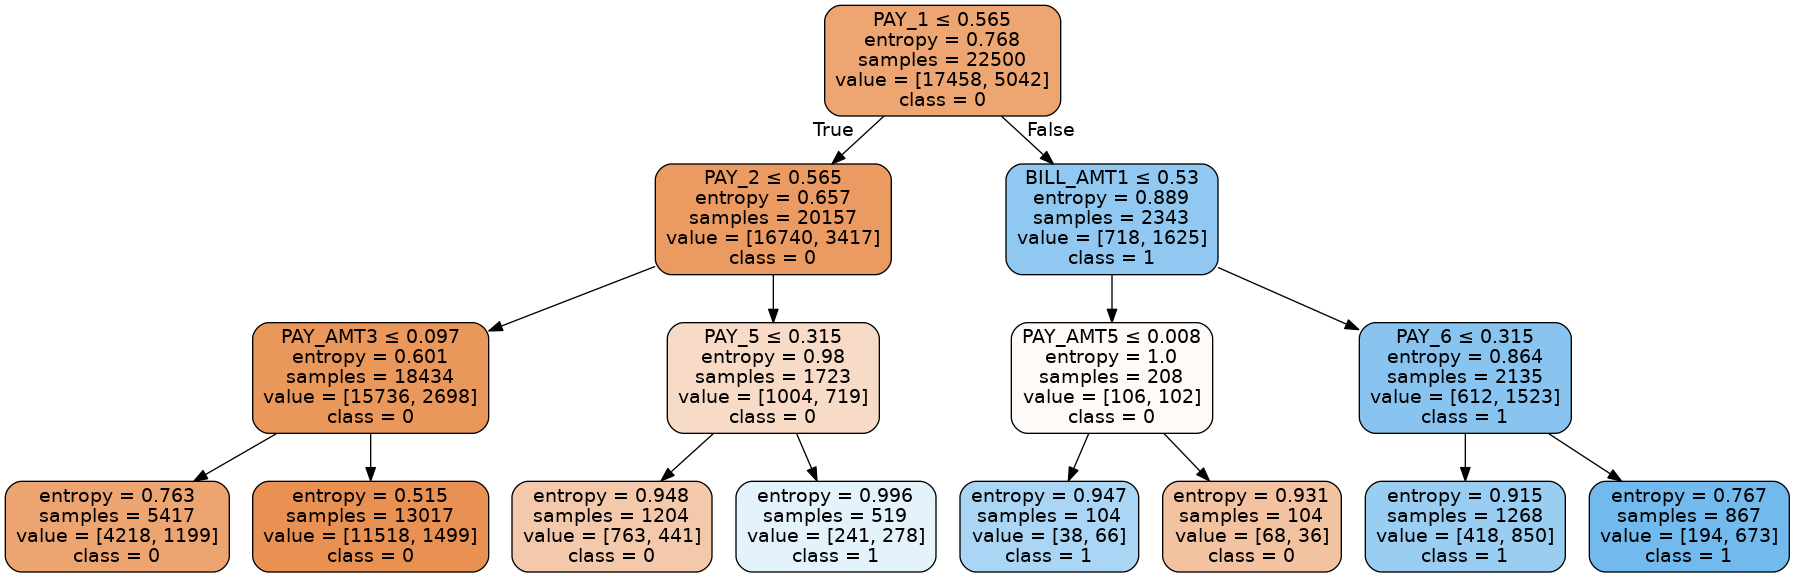

In [62]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('creditcard.png')
Image(graph.create_png())

### RandomForestClassifier All Features

In [79]:
#Create a Random Forest Classifier
forest=RandomForestClassifier(n_estimators=100)

# Training the classifier
forest.fit(X_resample,y_resample)

# Prediction on test set
y_pred=forest.predict(X_test)

# Print the accuracy of the classifier
print('The accuracy of the Random Forest using all variables is:',metrics.accuracy_score(y_test, y_pred).round(2))

The accuracy of the Random Forest using all variables is: 0.8


#### Random Forest Classifier All Features: Cross Validation

In [80]:
## 10-fold cross-validation to avoid over-fitting
scoring = 'accuracy'
cv_scores =cross_val_score(forest, X_resample, y_resample, cv=10, scoring=scoring)

print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Average 10-Fold CV Score: 0.8525 , Standard deviation: 0.0533


#### Random Forest All Features: Hyperparameter Optimization

In [81]:
# Create the random grid
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf_cv = RandomizedSearchCV(forest, param_distributions = param_dist, 
                           cv = 10, random_state=2019)
start_time = time.time()
rf_cv.fit(X_resample, y_resample)
print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

# Summarize results
print("Best: %f using %s" % (rf_cv.best_score_, rf_cv.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Tuned Random Forest Parameters: {'n_estimators': 100, 'max_features': 7, 'max_depth': 9, 'criterion': 'gini'}
Best: 0.758878 using {'n_estimators': 100, 'max_features': 7, 'max_depth': 9, 'criterion': 'gini'}
Execution time: 634.379047870636 ms


Accuracy: 0.7956
AUC: 0.7729755929469679
Average 10-Fold CV Score: 0.7578 , Standard deviation: 0.0307

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      5906
           1       0.52      0.56      0.54      1594

   micro avg       0.80      0.80      0.80      7500
   macro avg       0.70      0.71      0.70      7500
weighted avg       0.80      0.80      0.80      7500




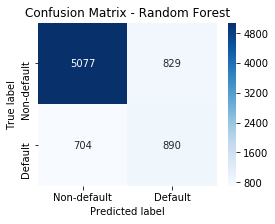

In [82]:
RFC = RandomForestClassifier(criterion= 'gini', max_depth= 9, 
                                     max_features= 7, n_estimators= 100, 
                                     random_state=2019)
RFC.fit(X_resample, y_resample)
y_pred = RFC.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

# Compute AUC of the model
y_pred_prob = RFC.predict_proba(X_test)[:,1]
print('AUC:', roc_auc_score(y_test, y_pred_prob))

## 10-fold cross-validation 
cv_scores =cross_val_score(RFC, X_resample, y_resample, cv=10)
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

# Print the 10-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()

# Plot Confusion Matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,RFC.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");

### RandomForestClassifier Important Features

In [83]:
#Create a Gaussian Classifier
forestimp=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
forestimp.fit(X1_resample,y1_resample)

# prediction on test set
y1_pred=forestimp.predict(X1_test)

print('The accuracy of the Random Forest using selected variables is:',metrics.accuracy_score(y1_test, y1_pred).round(2))

The accuracy of the Random Forest using selected variables is: 0.66


#### Random Forest Classifier Important Features: Cross Validation

In [84]:
## 10-fold cross-validation to avoid over-fitting
scoring = 'accuracy'
cv_scores =cross_val_score(forest, X1_resample, y1_resample, cv=10, scoring=scoring)

print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Average 10-Fold CV Score: 0.7017 , Standard deviation: 0.0175


#### Random Forest Important Features: Hyperparameter Optimization

In [85]:
# Create the random grid
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf_imp = RandomizedSearchCV(forestimp, param_distributions = param_dist, 
                           cv = 10, random_state=2019)

start_time = time.time()

rf_imp.fit(X1_resample, y1_resample)

print("Tuned Random Forest Parameters: %s" % (rf_imp.best_params_))

# Summarize results
print("Best: %f using %s" % (rf_imp.best_score_, rf_imp.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Tuned Random Forest Parameters: {'n_estimators': 150, 'max_features': 2, 'max_depth': 9, 'criterion': 'gini'}
Best: 0.706782 using {'n_estimators': 150, 'max_features': 2, 'max_depth': 9, 'criterion': 'gini'}
Execution time: 395.3785843849182 ms


Accuracy: 0.7476
AUC: 0.763865384116954
Average 10-Fold CV Score: 0.7064 , Standard deviation: 0.0096

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      5906
           1       0.43      0.60      0.50      1594

   micro avg       0.75      0.75      0.75      7500
   macro avg       0.66      0.69      0.67      7500
weighted avg       0.78      0.75      0.76      7500




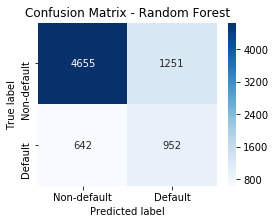

In [86]:
RFC_imp = RandomForestClassifier(criterion= 'gini', max_depth= 9, 
                                     max_features= 2, n_estimators= 150, 
                                     random_state=2019)
RFC_imp.fit(X1_resample, y1_resample)
y1_pred = RFC_imp.predict(X1_test)
print('Accuracy:', metrics.accuracy_score(y1_pred,y1_test))

# Compute AUC of the model
y_pred_prob = RFC_imp.predict_proba(X1_test)[:,1]
print('AUC:', roc_auc_score(y1_test, y_pred_prob))

## 10-fold cross-validation 
cv_scores =cross_val_score(RFC_imp, X1_resample, y1_resample, cv=10)

# Print the 10-fold cross-validation scores
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

# Print the classification report
print()
print(classification_report(y1_test, y1_pred))
print()

# Plot Confusion Matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y1_test,RFC_imp.predict(X1_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");

### Model Comparison

#### Comparison of ROC Curve of All Models

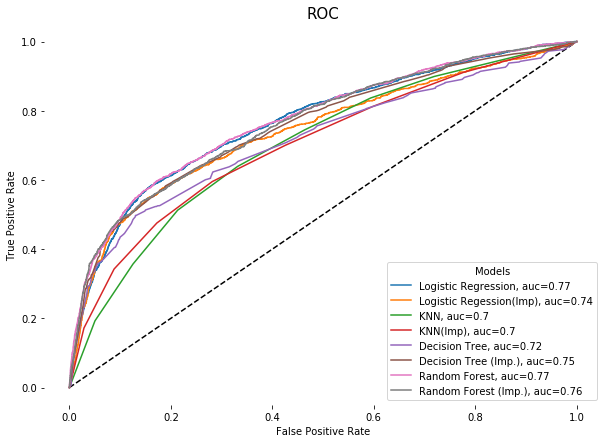

In [84]:
y_pred_proba_LR = LR.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_LR)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_LR)


y_pred_proba_LRimp = LR_imp.predict_proba(X1_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y1_test,  y_pred_proba_LRimp)
auc2 = metrics.roc_auc_score(y1_test, y_pred_proba_LRimp)

y_pred_proba_KNN = K_NN.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_KNN)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_KNN)

y_pred_proba_KNNimp = K_NNimp.predict_proba(X1_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y1_test,  y_pred_proba_KNNimp)
auc4 = metrics.roc_auc_score(y1_test, y_pred_proba_KNNimp)

y_pred_proba_DTC = DTC.predict_proba(X_test)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test,  y_pred_proba_DTC)
auc5 = metrics.roc_auc_score(y_test, y_pred_proba_DTC)

y_pred_proba_DTCimp = DTC_imp.predict_proba(X1_test)[::,1]
fpr6, tpr6, _ = metrics.roc_curve(y1_test,  y_pred_proba_DTCimp)
auc6 = metrics.roc_auc_score(y1_test, y_pred_proba_DTCimp)

y_pred_proba_RFC = RFC.predict_proba(X_test)[::,1]
fpr7, tpr7, _ = metrics.roc_curve(y_test,  y_pred_proba_RFC)
auc7 = metrics.roc_auc_score(y_test, y_pred_proba_RFC)

y_pred_proba_RFC_imp = RFC_imp.predict_proba(X1_test)[::,1]
fpr8, tpr8, _ = metrics.roc_curve(y1_test,  y_pred_proba_RFC_imp)
auc8 = metrics.roc_auc_score(y1_test, y_pred_proba_RFC_imp)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Logistic Regression, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Logistic Regession(Imp), auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="KNN, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="KNN(Imp), auc="+str(round(auc4,2)))
plt.plot(fpr5,tpr5,label="Decision Tree, auc="+str(round(auc5,2)))
plt.plot(fpr6,tpr6,label="Decision Tree (Imp.), auc="+str(round(auc6,2)))
plt.plot(fpr7,tpr7,label="Random Forest, auc="+str(round(auc7,2)))
plt.plot(fpr8,tpr8,label="Random Forest (Imp.), auc="+str(round(auc8,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

#### Comparison of Mean Accuracy using Cross-vaildation of all Models

In [85]:
#Append different models
models = []

# Logistic Regression with all features
models.append(('LogReg',
               LogisticRegression(C=0.5, max_iter=1000, dual=True, random_state=2019),'all'))

# Logistic Regression with important features
models.append(('LogReg(Imp)',
               LogisticRegression(C=0.2, max_iter=1000, dual=True, random_state=2019),'imp'))


# K-Nearest Neighbours with all features
models.append(('KNN',
               KNeighborsClassifier(n_neighbors = 7, weights='uniform'),'all'))

# K-Nearest Neighbors with important features
models.append(('KNN(Imp)',
               KNeighborsClassifier(n_neighbors = 7),'imp'))

# Decision Tree with all features
models.append(('Decision Tree', 
              DecisionTreeClassifier(criterion= 'gini', max_depth= 9, 
                                     max_features= 9, min_samples_leaf= 4, 
                                     random_state=2019),'all'))

# Decision Tree with important features
models.append(('Decision Tree(Imp)', 
              DecisionTreeClassifier(criterion= 'entropy', max_depth= 9, 
                                     max_features= 2, min_samples_leaf= 4, 
                                     random_state=2019),'all'))

# Random Forest Classifier with all features
models.append(('Random Forest', 
              RandomForestClassifier(criterion= 'gini', max_depth= 9, 
                                     max_features= 7, n_estimators= 100, 
                                     random_state=2019), 'all'))

# Random Forest Classifier with important features
models.append(('Random Forest(Imp)', 
              RandomForestClassifier(criterion= 'gini', max_depth= 9, 
                                     max_features= 2, n_estimators= 150, 
                                     random_state=2019), 'imp'))


# Evaluate each model
results = []
names = []
scoring = 'accuracy'

for name, model, data in models:
    if data == 'all':
        cv_results = cross_val_score(model, X_resample, y_resample, cv=10, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    else:
        cv_results = cross_val_score(model, X1_resample, y1_resample, cv=10, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LogReg: 0.698248 (0.010352)
LogReg(Imp): 0.683985 (0.008235)
KNN: 0.768245 (0.018772)
KNN(Imp): 0.718239 (0.010097)
Decision Tree: 0.723595 (0.026818)
Decision Tree(Imp): 0.675652 (0.017262)
Random Forest: 0.757822 (0.030693)
Random Forest(Imp): 0.706354 (0.009563)


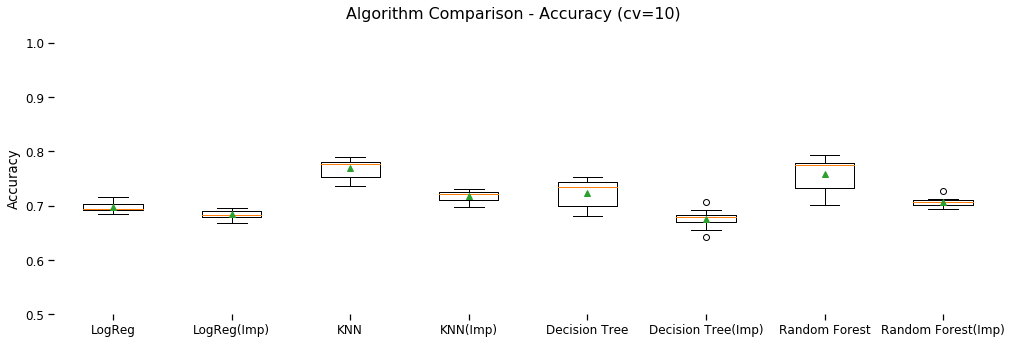

In [86]:
# Plot all the accuracy results vs. each model 
#(model type on the x-axis and accuracy on the y-axis).
fig = pyplot.figure(figsize=(17,5))
sns.set_context('notebook', font_scale=1.1)
fig.suptitle('Algorithm Comparison - Accuracy (cv=10)')
ax = fig.add_subplot(111)
pyplot.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy')
ax.set_ylim([0.5,1])
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

#### Comparison of Precision, Recall and F1-score of All Models

In [88]:

data_rows = [('Logistic Regression',' W/O Feature Selection', 0.79, 0.76, 0.77), 
             ('Logistic Regression', ' Important features', 0.79, 0.78, 0.79), 
             ('K-Nearest Neighbor', ' W/O Feature Selection', 0.76, 0.66, 0.69),
             ('K-Nearest Neighbor', ' Important Features', 0.77, 0.72, 0.74),
             ('Decision Tree', ' W/O Feature Selection', 0.78, 0.76, 0.77),
             ('Decision Tree', ' Important Features', 0.79, 0.75, 0.77),
             ('Random Forest', ' W/O Feature Selection', 0.80, 0.80, 0.80, ),
             ('Random Forest', ' Important features', 0.78, 0.75, 0.76),
             ]
t = Table(rows=data_rows, names=('Model', 'Data', 'Precision', 'Recall', 'F1-score'))
print(t)

       Model                 Data          Precision Recall F1-score
------------------- ---------------------- --------- ------ --------
Logistic Regression  W/O Feature Selection      0.79   0.76     0.77
Logistic Regression     Important features      0.79   0.78     0.79
 K-Nearest Neighbor  W/O Feature Selection      0.76   0.66     0.69
 K-Nearest Neighbor     Important Features      0.77   0.72     0.74
      Decision Tree  W/O Feature Selection      0.78   0.76     0.77
      Decision Tree     Important Features      0.79   0.75     0.77
      Random Forest  W/O Feature Selection       0.8    0.8      0.8
      Random Forest     Important features      0.78   0.75     0.76


Based on the AUC, Cross-Validation Mean Accuracy and F1-score results, Random Forest with all features outperforms all other models with an AUC of 0.77;   
CV Mean Accuracy of 0.757822 with a standard deviation of (0.030693)   
F1 score value of 0.80

<img src="ty.png">